# Random Forest - Classification

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("penguins_size.csv")

In [3]:
df = df.dropna()
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE

## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [5]:
df.describe()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        334.000000       334.000000         334.000000   334.000000
mean          43.994311        17.160479         201.014970  4209.056886
std            5.460521         1.967909          14.022175   804.836129
min           32.100000        13.100000         172.000000  2700.000000
25%           39.500000        15.600000         190.000000  3550.000000
50%           44.500000        17.300000         197.000000  4050.000000
75%           48.575000        18.700000         213.000000  4793.750000
max           59.600000        21.500000         231.000000  6300.000000

In [6]:
for feature in df.columns:
    if df[feature].dtype=="object":
        print(df[feature].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE' '.']


In [7]:
df[df["sex"]== "."]

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
336  Gentoo  Biscoe              44.5             15.7              217.0   

     body_mass_g sex  
336       4875.0   .

In [8]:
df[df.species =="Gentoo"].groupby("sex").describe().T

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [9]:
df.loc[336, "sex"] = "MALE"

In [10]:
df["species"].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

In [11]:
sns.countplot(x="species", data = df);

In [12]:
sns.countplot(x="species", data = df, hue = "sex");

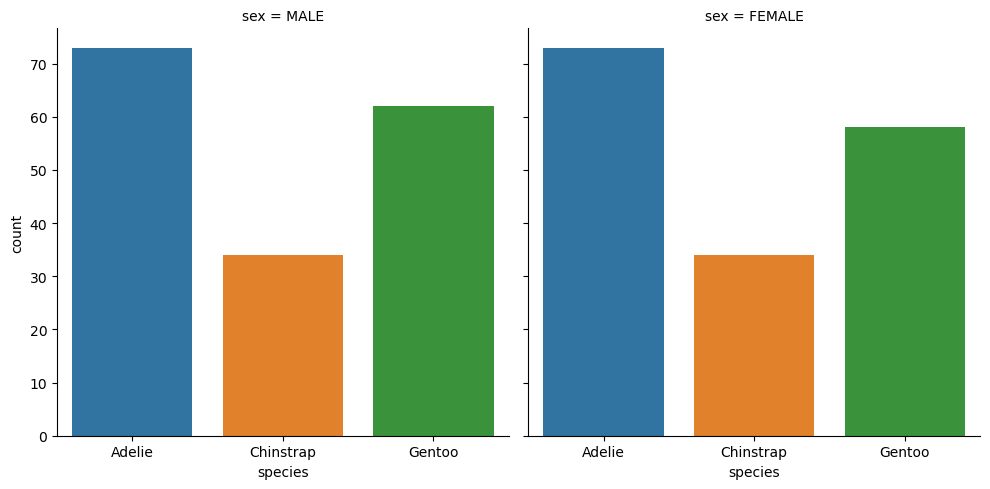

In [13]:
sns.catplot(x='species', data=df, kind='count',col='sex');

<Figure size 864x432 with 0 Axes>

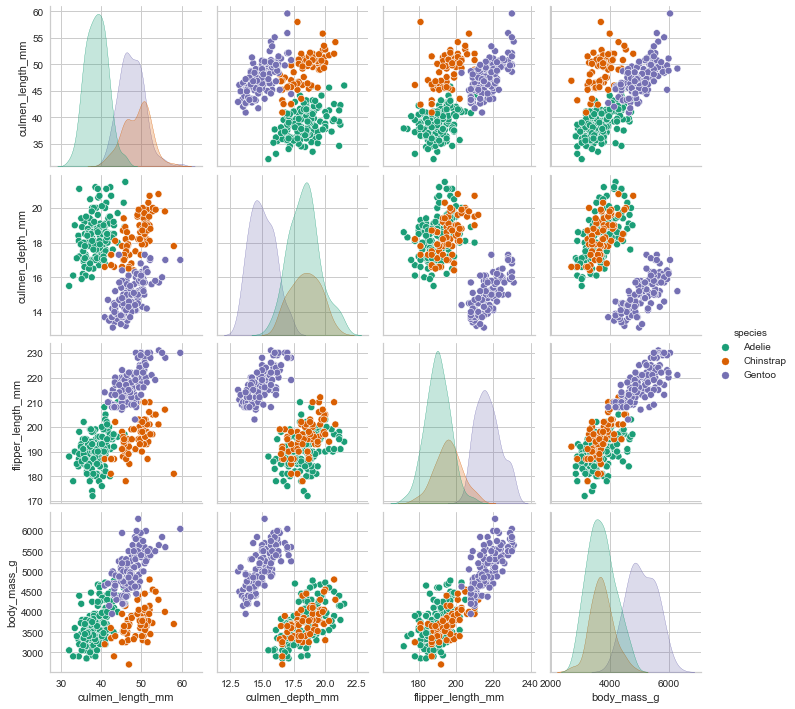

In [102]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='species',palette='Dark2');

In [103]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE

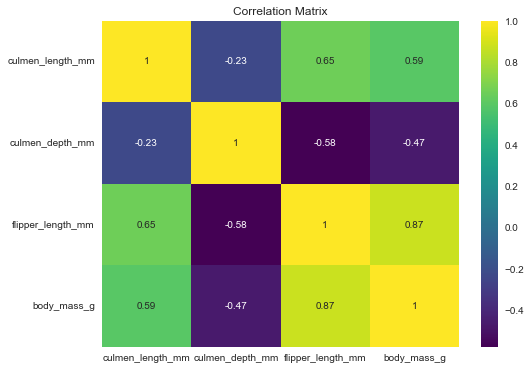

In [104]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

## Label Encoder 

Bu yöntemde, kategorik değişkenin her bir değeri benzersiz bir sayı ile eşleştirilir.

LabelEncoder: Tek bir sütunu kodlamak için kullanılır. Genellikle hedef değişkenler (Target) için idealdir.

## Ordinal Encoder

Sıralı kategorik değişkenler için kullanılır. Örneğin "düşük", "orta", "yüksek" değerlerini sırasıyla 0, 1, 2 olarak kodlayabilirsiniz.

OrdinalEncoder: Birden fazla kategorik sütunu aynı anda kodlamak için kullanılır. Özellik sütunları için daha uygundur.

Eğer kategorik değişkenler sıralı (ordinal) bir yapıya sahipse, bu sıralamayı koruyarak kodlama yapmak önemlidir. Bu, modelin doğru öğrenme yapabilmesi için gereklidir.

OrdinalEncoder ile bu tür sıralı kategorik veriyi dönüştürmek için, sıralamanızı belirten bir liste kullanarak kodlama yapabilirsiniz. Örneğin "düşük", "orta" ve "yüksek" sıralamasını koruyarak kodlamak isterseniz şu şekilde bir yaklaşım izleyebilirsiniz:

In [14]:
from sklearn.preprocessing import OrdinalEncoder

# Örnek veri
data = [["orta"], ["düşük"], ["yüksek"], ["düşük"], ["yüksek"], ["orta"]]

# Sıralamayı belirtmek için kategori listesi
categories = [['düşük', 'orta', 'yüksek']]

encoder = OrdinalEncoder(categories=categories)
encoded_data = encoder.fit_transform(data)

print(encoded_data)

[[1.]
 [0.]
 [2.]
 [0.]
 [2.]
 [1.]]


Eğer bir özellik için kategorik değerlerin sırası önemli değilse ve OrdinalEncoder'ı sıralama belirtmeden kullanırsanız, bu durumda OrdinalEncoder'ın yaptığı dönüşüm, LabelEncoder'ın tek bir sütun için yapacağı dönüşüme benzer şekilde alfabetik sıralama üzerinden gerçekleşir.

Ancak, şu önemli farkları unutmamak gerekir:

**LabelEncoder**, yalnızca tek bir sütunu dönüştürmek için tasarlanmıştır. **OrdinalEncoder** ise birden çok sütunu aynı anda dönüştürebilir.

**LabelEncoder** genellikle hedef değişkenleri (etiketleri) dönüştürmek için önerilirken, **OrdinalEncoder** özellik sütunları (features) için önerilir.

Özetle, eğer bir özelliğin kategorik değerlerinin sırası önemli değilse ve bu değerleri sayısal formata dönüştürmek istiyorsanız, LabelEncoder veya OrdinalEncoder'ı (sıralama belirtmeden) kullanabilirsiniz.

Ancak, **birden çok sütunu aynı anda dönüştürme** ihtiyacınız varsa, bu durumda OrdinalEncoder daha uygun bir seçenek olacaktır.

Uzun lafın kısası ordinal encoder kullanmak daha mantıklı. Sadece hiyerarşi içeren features için hiyerarşi oluşturmak önemli!!

## Diğer

target encoding

frequency encoding

# Peki hangisini hangisinde kullanacağız?

### Lineer Regresyon Modelleri

**Nominal Değişkenler:** One-Hot Encoding (get_dummies). Ancak multicollinearity sorununu engellemek için bir kategori düşürmelisiniz (dummy variable trap'ten kaçınmak için).

**Ordinal Değişkenler:** Ordinal Encoding veya belirli bir sıralama mantığı varsa map fonksiyonu.

### Ağaç Tabanlı Modeller (Karar Ağaçları, Rastgele Ormanlar, XGBoost, LightGBM vs.)

**Nominal ve Ordinal Değişkenler:** Bu modeller kategorik değişkenlerle başa çıkabilecek kapasiteye sahip oldukları için genellikle Label Encoding (ordinal encoding) yeterli olacaktır. Özellikle LightGBM, kategorik değişkenleri doğrudan işleyebilme kapasitesine sahiptir. One-Hot Encoding, bu tür modellerde performansı düşürebilir ve modelin eğitim süresini uzatabilir.


### Lojistik Regresyon

**Nominal Değişkenler:** One-Hot Encoding.

**Ordinal Değişkenler:** Ordinal Encoding.


### Destek Vektör Makineleri (SVM), K-En Yakın Komşu (KNN) gibi mesafe tabanlı algoritmalar

**Nominal Değişkenler:** One-Hot Encoding tercih edilmelidir, çünkü bu algoritmalar özellikler arasındaki mesafeye dayalıdır ve nominal değişkenler için label encoding yanıltıcı olabilir.

**Ordinal Değişkenler:** Ordinal Encoding.


### Sinir Ağları (Neural Networks)

**Nominal Değişkenler:** One-Hot Encoding genellikle tercih edilir.

**Ordinal Değişkenler:** Ordinal Encoding veya One-Hot Encoding kullanılabilir. Modelin karmaşıklığına ve veri setinin yapısına bağlı olarak en iyi sonucu veren yaklaşımı seçmek için denemeler yapılabilir.


### Naive Bayes

**Nominal Değişkenler:** One-Hot Encoding.

**Ordinal Değişkenler:** Ordinal Encoding ya da Label Encoding.


Yukarıda sadece literatür destekli şahsi önerilerimi yazdım. Özellikle karmaşık ve büyük veri setleri üzerinde çalışırken, hangi kodlama yönteminin en iyi sonucu verdiğini görmek için best practice kavramı aklınızdan çıkmasın. Bu kapsamda denemeler yapmak ve çapraz doğrulama(CV) yöntemleri kullanarak model performansını değerlendirmek önemlidir. Kısaca en iyi skor hangisinde ise oradan devam etmek doğru olur.

# Encoder

https://bookdown.org/max/FES/categorical-trees.html

https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769

In [15]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [16]:
data = {"animal": ["cat", "dog", "horse", "lion", "tiger"]}     # Egitilen data
predict = {"animal": ["lion", "horse"]}      # Tahminlerin alinacagi data

In [17]:
data = pd.DataFrame(data)
data

animal
0    cat
1    dog
2  horse
3   lion
4  tiger

In [18]:
predict = pd.DataFrame(predict)
predict

animal
0   lion
1  horse

In [19]:
or_encoder = OrdinalEncoder()
or_encoder.fit(data)    # Butun dataya uygulandi.

OrdinalEncoder()

In [20]:
data_or_encoder = or_encoder.transform(data)
pred_or_encoder = or_encoder.transform(predict)

In [21]:
data = {"animal": ["cat", "dog", "horse", "lion", "tiger"]}     # Egitilen data
predict = {"animal": ["lion", "horse"]}      # Tahminlerin alinacagi data

In [22]:
lab_encoder = LabelEncoder()
lab_encoder.fit(data["animal"])   # Butun dataya uygulandi.

LabelEncoder()

In [23]:
data_lab_encoded = lab_encoder.transform(data['animal'])
pred_lab_encoded = lab_encoder.transform(predict['animal'])

In [24]:
print("Eğitim verisinin ordinal kodlanmış hali:", data_or_encoder)
print("Tahmin verisinin ordinal kodlanmış hali:", pred_or_encoder)
print("Eğitim verisinin label kodlanmış hali:", data_lab_encoded)
print("Tahmin verisinin label kodlanmış hali:", pred_lab_encoded)

Eğitim verisinin ordinal kodlanmış hali: [[0.]
 [1.]
 [2.]
 [3.]
 [4.]]
Tahmin verisinin ordinal kodlanmış hali: [[3.]
 [2.]]
Eğitim verisinin label kodlanmış hali: [0 1 2 3 4]
Tahmin verisinin label kodlanmış hali: [3 2]


## Train | Test Split

In [25]:
X = df.drop('species',axis=1)
y = df['species']

In [26]:
cat = X.select_dtypes("object").columns
cat

Index(['island', 'sex'], dtype='object')

In [27]:
X[cat]

island     sex
0    Torgersen    MALE
1    Torgersen  FEMALE
2    Torgersen  FEMALE
4    Torgersen  FEMALE
5    Torgersen    MALE
..         ...     ...
338     Biscoe  FEMALE
340     Biscoe  FEMALE
341     Biscoe    MALE
342     Biscoe  FEMALE
343     Biscoe    MALE

[334 rows x 2 columns]

In [28]:
encoders = {}
for column in cat:
    lab_enc = LabelEncoder()
    X[column] = lab_enc.fit_transform(X[column])
    encoders[column] = lab_enc  # Oluşturulan LabelEncoder nesnesini sözlükte saklayalım

In [29]:
X.head()

# genel kural btün kategorik datayı numeriğe çevirmemeiz gerekir. bütün data daki kategorikleri numeriğe çevirir.

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0       2              39.1             18.7              181.0       3750.0   
1       2              39.5             17.4              186.0       3800.0   
2       2              40.3             18.0              195.0       3250.0   
4       2              36.7             19.3              193.0       3450.0   
5       2              39.3             20.6              190.0       3650.0   

   sex  
0    1  
1    0  
2    0  
4    0  
5    1

In [30]:
encoders

{'island': LabelEncoder(), 'sex': LabelEncoder()}

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Modelling and Model Performance

In [34]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [36]:
dt_model = DecisionTreeClassifier(random_state=101)
dt_model.fit(X_train, y_train)
eval_metric(dt_model, X_train, y_train, X_test, y_test)

# encoder yaptığımızda sonuçlar daha iyi çıktı  

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



__Cross Validate__

In [37]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [38]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.974457
test_precision_micro    0.974457
test_recall_micro       0.974457
test_f1_micro           0.974457
dtype: float64

### DT Model Feature Importance

In [39]:
dt_feature_imp = pd.DataFrame(index = X.columns, data = dt_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
dt_feature_imp

Feature Importance
flipper_length_mm            0.531201
culmen_length_mm             0.336093
island                       0.084673
body_mass_g                  0.028136
sex                          0.010853
culmen_depth_mm              0.009044

## DT get dummies scores

In [40]:
sns.barplot(x=dt_feature_imp["Feature Importance"], y=dt_feature_imp.index)
plt.title("Feature Importance")
plt.show()

### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


__PARAMETERS__

In [43]:
rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [44]:
model = RandomForestClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.995833
test_precision_micro    0.995833
test_recall_micro       0.995833
test_f1_micro           0.995833
dtype: float64

### RF Model Feature Importance

In [45]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

Feature Importance
culmen_length_mm             0.364040
flipper_length_mm            0.228925
body_mass_g                  0.152599
culmen_depth_mm              0.142287
island                       0.105742
sex                          0.006407

In [46]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance for Random Forest")
plt.show()

In [47]:
pd.concat([rf_feature_imp, dt_feature_imp], axis=1)

Feature Importance  Feature Importance
culmen_length_mm             0.364040            0.336093
flipper_length_mm            0.228925            0.531201
body_mass_g                  0.152599            0.028136
culmen_depth_mm              0.142287            0.009044
island                       0.105742            0.084673
sex                          0.006407            0.010853

## Understanding Hyperparameters

In [48]:
from sklearn.tree import plot_tree

def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model.estimators_[10], feature_names=X.columns, 
          class_names=df.species.unique(),
          filled = True,
          fontsize = 8);

In [49]:
pruned_tree = RandomForestClassifier()
pruned_tree.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
report_model(pruned_tree)



Test Set
[[41  0  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



## Prediction

In [51]:
df.describe().T

count         mean         std     min     25%     50%  \
culmen_length_mm   334.0    43.994311    5.460521    32.1    39.5    44.5   
culmen_depth_mm    334.0    17.160479    1.967909    13.1    15.6    17.3   
flipper_length_mm  334.0   201.014970   14.022175   172.0   190.0   197.0   
body_mass_g        334.0  4209.056886  804.836129  2700.0  3550.0  4050.0   

                        75%     max  
culmen_length_mm     48.575    59.6  
culmen_depth_mm      18.700    21.5  
flipper_length_mm   213.000   231.0  
body_mass_g        4793.750  6300.0

In [52]:
observations = {"island": ["Torgersen", "Biscoe"], "culmen_length_mm":[35, 48], "culmen_depth_mm":[15, 20],
               "flipper_length_mm":[180, 210], "body_mass_g":[3000, 4600], "sex":["FEMALE", "MALE"]}

In [53]:
obs = pd.DataFrame(observations)
obs

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Torgersen                35               15                180   
1     Biscoe                48               20                210   

   body_mass_g     sex  
0         3000  FEMALE  
1         4600    MALE

In [54]:
obs[cat] 

island     sex
0  Torgersen  FEMALE
1     Biscoe    MALE

In [55]:
for column in cat:
    lab_enc = LabelEncoder()
    obs[column] = lab_enc.fit_transform(obs[column])
    encoders[column] = lab_enc  # Oluşturulan LabelEncoder nesnesini sözlükte saklayalım

In [56]:
pred = rf_model.predict(obs)
pred

array(['Adelie', 'Gentoo'], dtype=object)

## Inverse transform

In [57]:
# Şimdi veriyi tekrar orijinal hallerine döndürelim
for column, encoder in encoders.items():
    obs[column] = encoder.inverse_transform(obs[column])

In [58]:
obs

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Torgersen                35               15                180   
1     Biscoe                48               20                210   

   body_mass_g     sex  
0         3000  FEMALE  
1         4600    MALE

In [59]:
pred = pd.Series(pred).rename("prediction")

In [60]:
pd.concat([obs, pred], axis=1)

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Torgersen                35               15                180   
1     Biscoe                48               20                210   

   body_mass_g     sex prediction  
0         3000  FEMALE     Adelie  
1         4600    MALE     Gentoo

## Evaluating ROC Curves and AUC

In [61]:
from yellowbrick.classifier import ROCAUC

rf_model = RandomForestClassifier()
visualizer = ROCAUC(rf_model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                       # Finalize and render the figure

## DT and RF Scoring for diabetes dataset

In [62]:
df = pd.read_csv("diabetes.csv")

In [63]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [65]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Train | Test Split and Scalling

In [66]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## Modelling and Model Performance

### Decision Tree

In [69]:
dt_model = DecisionTreeClassifier(class_weight = "balanced", random_state=101)

In [70]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=101)

In [71]:
eval_metric(dt_model, X_train, y_train, X_test, y_test) # overfit var ilk önce CV sonra GridSearch ile parametreleri vereceğiz.

Test_Set
[[89 35]
 [20 48]]
              precision    recall  f1-score   support

           0       0.82      0.72      0.76       124
           1       0.58      0.71      0.64        68

    accuracy                           0.71       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.73      0.71      0.72       192


Train_Set
[[376   0]
 [  0 200]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       200

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



__Cross Validate__

In [72]:
model = DecisionTreeClassifier(class_weight = "balanced", random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy     0.673533
test_precision    0.540205
test_recall       0.525000
test_f1           0.529386
dtype: float64

__GridSearch__

In [73]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, 3, 5, 7],    #None= Butun feature' lari kullan
              "max_depth": [None, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_leaf": [1, 2, 3, 5],
              "min_samples_split": [2, 3, 5, 7, 9, 15]}

In [74]:
model = DecisionTreeClassifier(class_weight = "balanced", random_state=101)
dt_grid_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits


In [75]:
dt_grid_model.best_params_

{'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 9,
 'splitter': 'random'}

In [76]:
eval_metric(dt_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[50 74]
 [10 58]]
              precision    recall  f1-score   support

           0       0.83      0.40      0.54       124
           1       0.44      0.85      0.58        68

    accuracy                           0.56       192
   macro avg       0.64      0.63      0.56       192
weighted avg       0.69      0.56      0.56       192


Train_Set
[[159 217]
 [ 19 181]]
              precision    recall  f1-score   support

           0       0.89      0.42      0.57       376
           1       0.45      0.91      0.61       200

    accuracy                           0.59       576
   macro avg       0.67      0.66      0.59       576
weighted avg       0.74      0.59      0.58       576



__Cross Validate__

In [77]:
model = DecisionTreeClassifier(class_weight = "balanced", random_state=101, 
                 max_depth= 5,
                 max_features= 3,
                 min_samples_leaf= 2,
                 min_samples_split= 9,
                 splitter= 'random')

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy     0.578342
test_precision    0.470387
test_recall       0.825000
test_f1           0.574327
dtype: float64

In [78]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, average_precision_score

In [79]:
plot_precision_recall_curve(dt_grid_model, X_test, y_test);

### Random Forest

In [80]:
rf_model = RandomForestClassifier(class_weight = "balanced", random_state=101)

In [81]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [82]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[102  22]
 [ 27  41]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       124
           1       0.65      0.60      0.63        68

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.72       192
weighted avg       0.74      0.74      0.74       192


Train_Set
[[376   0]
 [  0 200]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       200

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



__Cross Validate__

In [83]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy     0.753479
test_precision    0.700727
test_recall       0.565000
test_f1           0.614788
dtype: float64

__Grid Search__

In [84]:
param_grid = {'n_estimators':[50, 64, 100, 128, 300],     #64 ve 128 skorlarina mutlaka bakilmasi gerektigini belirtmistik.
             'max_features':[2, 3, 4, "auto"],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [85]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "recall", n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


In [86]:
rf_grid_model.best_params_

{'max_depth': 3, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 50}

In [87]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[86 38]
 [16 52]]
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       124
           1       0.58      0.76      0.66        68

    accuracy                           0.72       192
   macro avg       0.71      0.73      0.71       192
weighted avg       0.75      0.72      0.72       192


Train_Set
[[294  82]
 [ 35 165]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       376
           1       0.67      0.82      0.74       200

    accuracy                           0.80       576
   macro avg       0.78      0.80      0.79       576
weighted avg       0.82      0.80      0.80       576



__Precision_Recall_Curve__

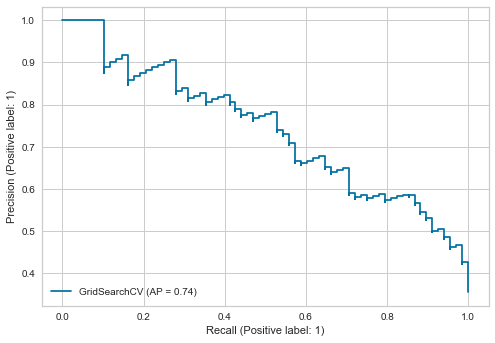

In [88]:
plot_precision_recall_curve(rf_grid_model, X_test, y_test);